In [9]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
mpl.use('nbAgg')

Make a classification dataset as following 

In [10]:
from sklearn.datasets import make_blobs 
X_2, y_2 = make_blobs(n_samples = 100, n_features = 2, centers = 8, cluster_std = 1.3, random_state = 4) 
y_2 = y_2 % 2 

1.Split data into training data and test data by (25points) 

<IPython.core.display.Javascript object>


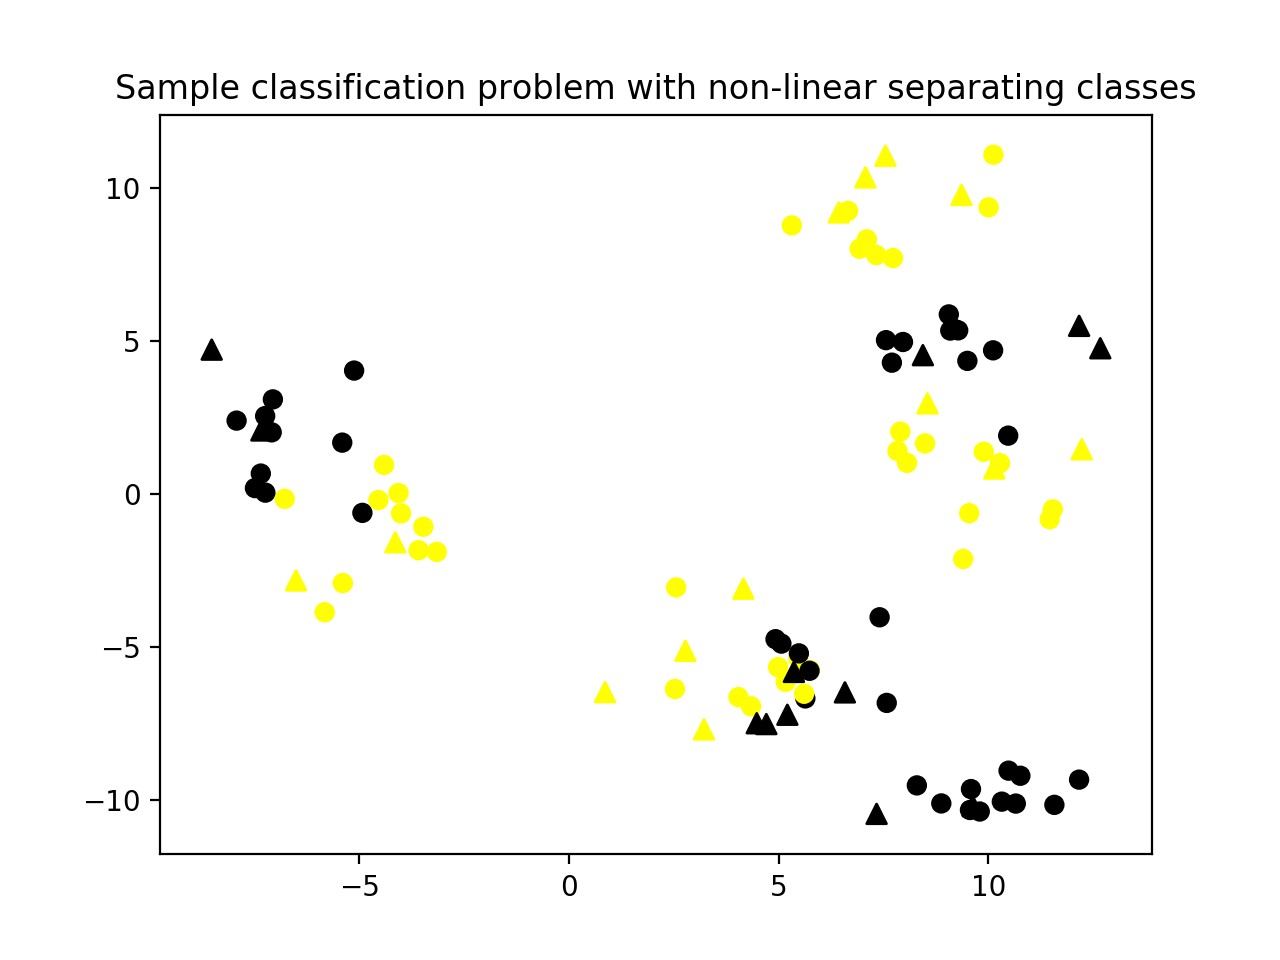

In [17]:
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FFFF01', '#00FF00', '#0000FF','#000000'])

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, random_state=0) 

plt.figure()
plt.title('Sample classification problem with non-linear separating classes')
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, marker= 'o', s=40, cmap=cmap_bold)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker= '^', s=50, cmap=cmap_bold)
plt.show()

2.Write a program that fits a SVM model (sklearn.svm.SVC) on the training data X_train for linear kernel, RBF kernel, and Polynomial kernel with degree of 3 (using default parameter setting). For each model, plot the decision boundary and class region like the figure below. (50 points) 

<IPython.core.display.Javascript object>


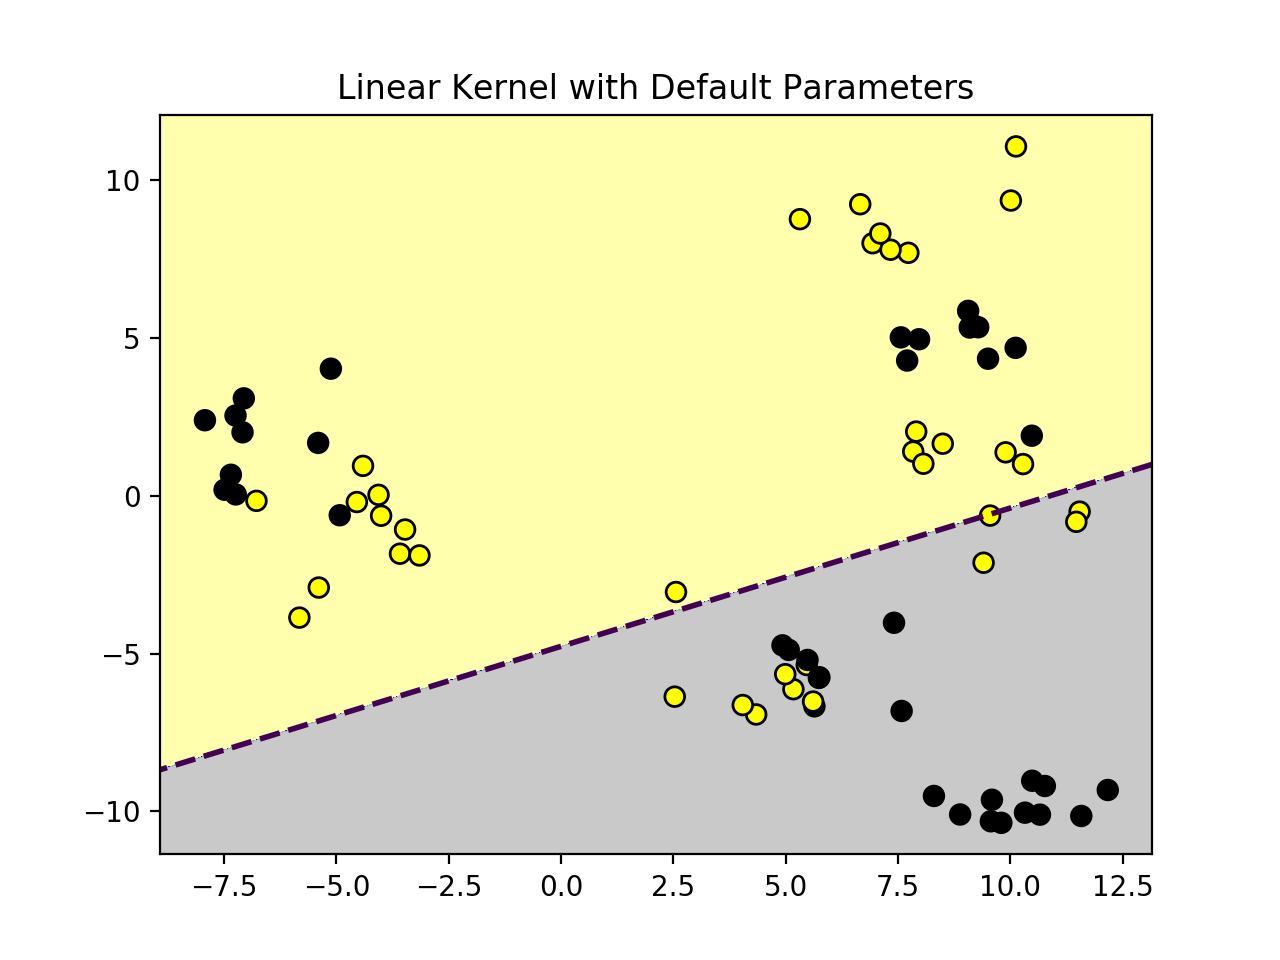

<IPython.core.display.Javascript object>


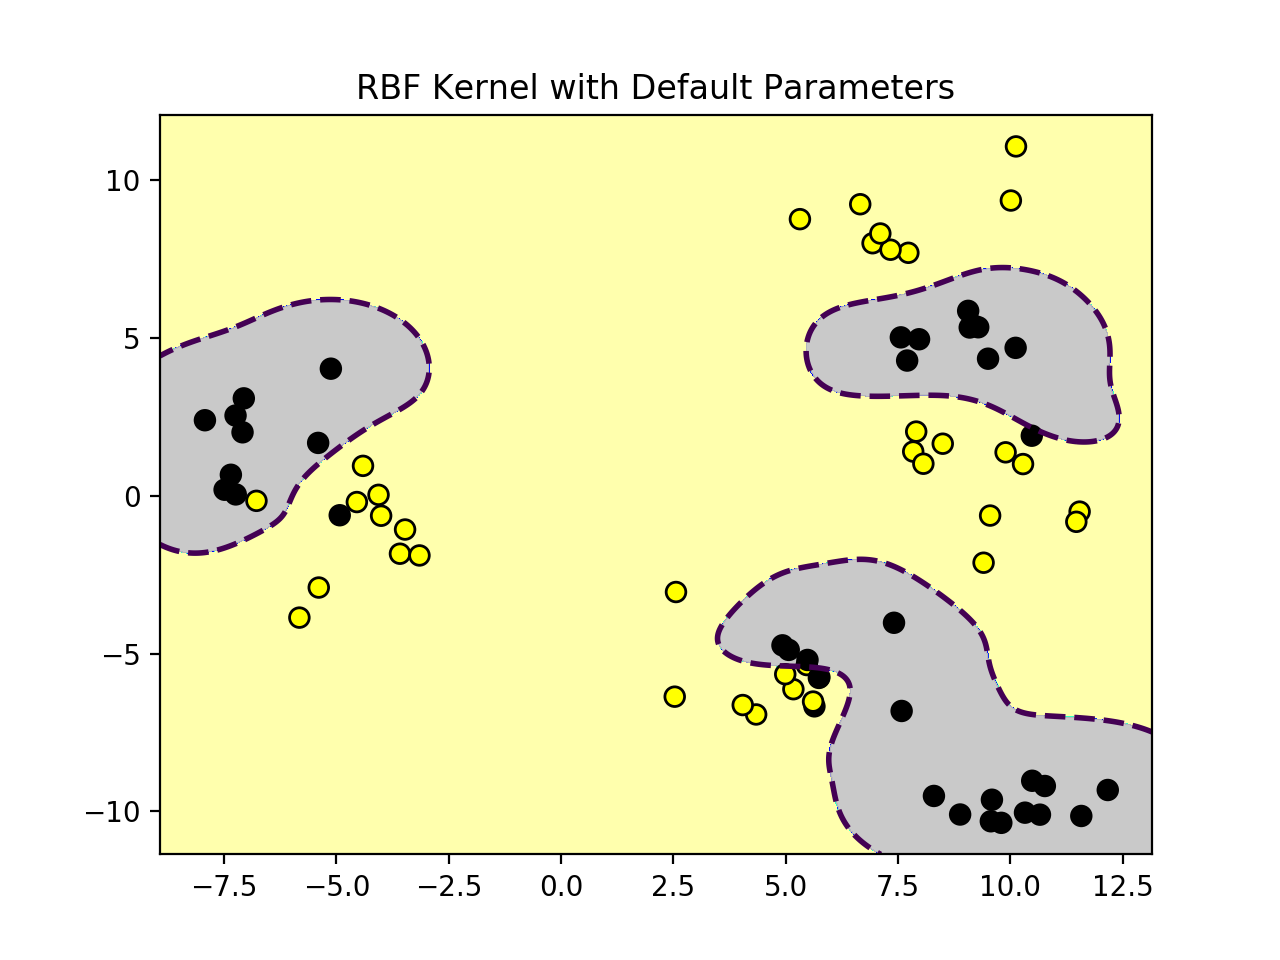

<IPython.core.display.Javascript object>


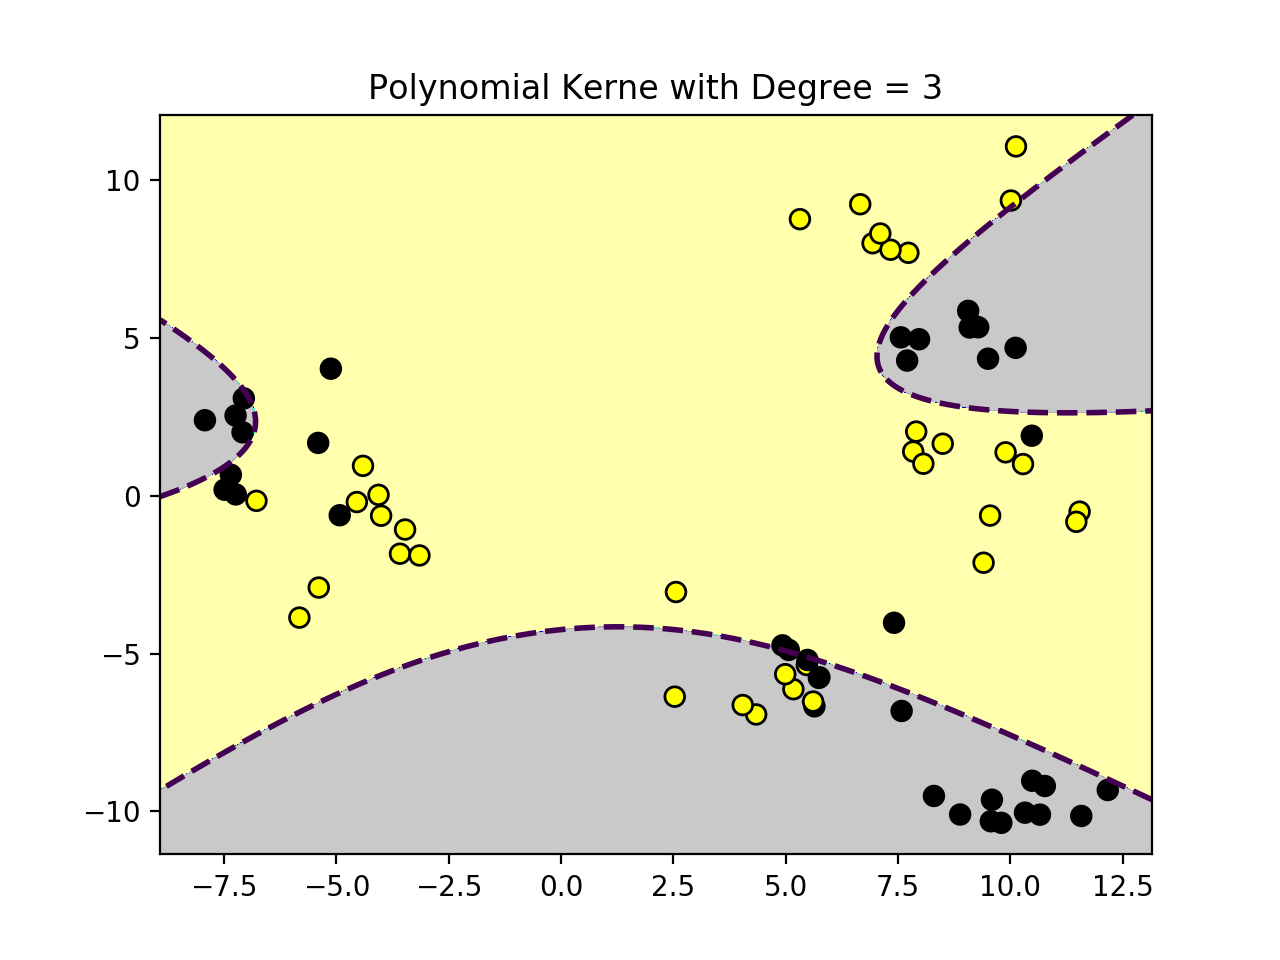

In [12]:
from sklearn.svm import SVC

cmap_light = ListedColormap(['#FFFF99', '#00FFCC', '#0000FF','#BCBCBC'])
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Linear kernel SVM
clf = SVC(kernel = 'linear', gamma = 'auto').fit(X_train, y_train)

# plot prediction

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot the decision function for each datapoint on the grid
Z1 = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)

plt.figure()
contours = plt.contour(xx, yy, Z1, levels=[0], linewidths=2, linestyles='dashed')
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha = 0.8)
plt.scatter(X0, X1, c=y_train, marker= 'o', s=50, cmap=cmap_bold, edgecolors='k')
plt.title("Linear Kernel with Default Parameters")
plt.show()

# RBF kernel SVM
clf = SVC(gamma = 'auto').fit(X_train, y_train)

# plot prediction

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot the decision function for each datapoint on the grid
Z1 = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)

plt.figure()
contours = plt.contour(xx, yy, Z1, levels=[0], linewidths=2, linestyles='dashed')
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha = 0.8)
plt.scatter(X0, X1, c=y_train, marker= 'o', s=50, cmap=cmap_bold, edgecolors='k')
plt.title("RBF Kernel with Default Parameters")

# Polynomial kernel SVM
clf = SVC(kernel='poly', degree=3, gamma = 'auto').fit(X_train, y_train)

# plot prediction
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot the decision function for each datapoint on the grid
Z1 = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)

plt.figure()
# plot the decision boundar only 
contours = plt.contour(xx, yy, Z1, levels=[0], linewidths=2, linestyles='dashed')
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha = 0.8)
plt.scatter(X0, X1, c=y_train, marker= 'o', s=50, cmap=cmap_bold, edgecolors='k')
plt.title("Polynomial Kerne with Degree = 3")

plt.show()

3.For linear model, use C = 0.01, 0.1, 1,10, 100 respectively and calculate the fitting score for test data for each case. What conclusion you might draw? For RBF model, Use C=0.1, 1, 10 and gamma = 0.01, 1, 10, 100 and calculate fitting score for test data. What conclusion you might draw? For polynomial model with degree of 3, use parameters C = 0.1, 1, 10 and degree = 2, 3, 4, 5 and calculate fitting score for test data. What conclusion you might draw? (25Points) 

In [13]:
# Linear kernel SVM

print('Linear-kernal SVC:')
for C in [0.01, 0.1, 1, 10, 100]:
    
    clf = SVC(C = C, kernel = 'linear', gamma = 'auto').fit(X_train, y_train)
  
    # print fitting scores for both training data and t
    s_train = clf.score(X_train, y_train)
    s_test = clf.score(X_test, y_test) 
    print('\t C = {}; training score = {:.2f}; test score = {:.2f}'.format(C, s_train, s_test))

Linear-kernal SVC:
	 C = 0.01; training score = 0.57; test score = 0.64
	 C = 0.1; training score = 0.57; test score = 0.64
	 C = 1; training score = 0.57; test score = 0.64
	 C = 10; training score = 0.57; test score = 0.64
	 C = 100; training score = 0.57; test score = 0.68


From these scores we can see that the raning and the data are very in line with what we wourrd wanht to see. . When we increase the size of c we see that the tes score gose up while the traning score sdould always be the same. as you change the degrees in the polynomial ve want to ee a convergance that would prove our data model is a true variant of our prodictions.

In [14]:
# RBF SVM

print('RBF-kernal SVC:')
for gamma in [0.01, 1, 10, 100]:
    for C in [0.1, 1, 10]:
        
        clf = SVC(C = C, gamma = gamma).fit(X_train, y_train)
        s_train = clf.score(X_train, y_train)
        s_test = clf.score(X_test, y_test)
  
        # print fitting scores for both training data and test data
        print('\t gamma = {} and C = {}; traing score = {:.2f}, test score = {:.2f}'
              .format(gamma, C, s_train, s_test))

RBF-kernal SVC:
	 gamma = 0.01 and C = 0.1; traing score = 0.59, test score = 0.64
	 gamma = 0.01 and C = 1; traing score = 0.75, test score = 0.68
	 gamma = 0.01 and C = 10; traing score = 0.89, test score = 0.76
	 gamma = 1 and C = 0.1; traing score = 0.51, test score = 0.48
	 gamma = 1 and C = 1; traing score = 0.95, test score = 0.72
	 gamma = 1 and C = 10; traing score = 0.99, test score = 0.72
	 gamma = 10 and C = 0.1; traing score = 0.51, test score = 0.48
	 gamma = 10 and C = 1; traing score = 0.99, test score = 0.60
	 gamma = 10 and C = 10; traing score = 0.99, test score = 0.64
	 gamma = 100 and C = 0.1; traing score = 0.51, test score = 0.48
	 gamma = 100 and C = 1; traing score = 1.00, test score = 0.56
	 gamma = 100 and C = 10; traing score = 1.00, test score = 0.56


THis is a much more diverse set ad as we loop though both we see much more variation it the test score changes. We see some convergance at the hgher C levels.

In [15]:
# Polynomial SVM

print('Poly-kernal SVC:')
for degree in [2, 3, 4, 5]:
    for C in [0.1, 1, 10]:
    
        clf = SVC(C = C, degree = degree, gamma = 'auto').fit(X_train, y_train)
        s_train = clf.score(X_train, y_train)
        s_test = clf.score(X_test, y_test)
        # print fitting scores for both training data and test data
        print('\t C = {} and degree = {}; train score ={:.2f} and test score = {:.2f}'
              .format(C, degree, s_train, s_test))

Poly-kernal SVC:
	 C = 0.1 and degree = 2; train score =0.51 and test score = 0.48
	 C = 1 and degree = 2; train score =0.92 and test score = 0.76
	 C = 10 and degree = 2; train score =0.97 and test score = 0.72
	 C = 0.1 and degree = 3; train score =0.51 and test score = 0.48
	 C = 1 and degree = 3; train score =0.92 and test score = 0.76
	 C = 10 and degree = 3; train score =0.97 and test score = 0.72
	 C = 0.1 and degree = 4; train score =0.51 and test score = 0.48
	 C = 1 and degree = 4; train score =0.92 and test score = 0.76
	 C = 10 and degree = 4; train score =0.97 and test score = 0.72
	 C = 0.1 and degree = 5; train score =0.51 and test score = 0.48
	 C = 1 and degree = 5; train score =0.92 and test score = 0.76
	 C = 10 and degree = 5; train score =0.97 and test score = 0.72


THis is an even bigger spread then the first 2 models we made with the additinal changes we see positive outcomes that directly show the effectivness of the model